# Modelling the data

In this notebook, we'll focus on modelling the [credit card fraud detection dataset](../data/creaditcard.csv) as well as serializing the model.

This notebook builds from our analysis from our notebook 📓 on [understanding the dataset](Understanding%20the%20dataset.ipynb), our primary focus here would be modelling the imbalance dataset.

In [1]:
# Data Manipulation Tools
import numpy as np
import pandas as pd

# Data Modelling tools
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

In [2]:
data_path = "../data/creditcard.csv"

credit_card_data = pd.read_csv(data_path)
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Adding Implementation Criteria 

For implementation sake, we'll be preprocessing the feature columns to range from the values 0-1 using the sklearn MinMax Scalar

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
pca_features = list(credit_card_data.iloc[:, 1:-2].columns)

credit_card_data[pca_features] = MinMaxScaler().fit_transform(credit_card_data[pca_features])

In [5]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.958294,0.767258,0.837414,0.251930,0.765716,0.263020,0.265356,0.785385,0.462780,...,0.561480,0.510031,0.665434,0.382234,0.577907,0.425448,0.416511,0.313124,88.349619,0.001727
std,47488.145955,0.033276,0.017424,0.026275,0.062764,0.009292,0.013395,0.007537,0.012812,0.037846,...,0.011841,0.033854,0.009274,0.081611,0.029261,0.078771,0.007450,0.006698,250.120109,0.041527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54201.500000,0.942658,0.760943,0.821985,0.214311,0.761060,0.255295,0.261980,0.783148,0.440626,...,0.557798,0.484730,0.663030,0.334454,0.560104,0.372036,0.415203,0.312049,5.600000,0.000000
50%,84692.000000,0.958601,0.767949,0.840530,0.251050,0.765351,0.260263,0.265600,0.785625,0.461008,...,0.561005,0.510347,0.665267,0.387756,0.578838,0.416932,0.416536,0.313352,22.000000,0.000000
75%,139320.500000,0.980645,0.775739,0.855213,0.284882,0.769836,0.267027,0.268831,0.788897,0.483350,...,0.564484,0.534688,0.667626,0.441460,0.597593,0.464807,0.418191,0.314712,77.165000,0.000000
max,172792.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25691.160000,1.000000


In [6]:
target_column = "Class"

data, target = credit_card_data.drop(target_column, axis=1), credit_card_data[target_column]

We'll apply the stratified mode of sampling the dataset to ensure we maintain the balance of train and test set even while we split the data. The train set though would make more sense as 3/4 of the first split and 8/10 of the second split. 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, train_size=3/4, 
    stratify=target, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, train_size=8/10, 
    stratify=y_train, random_state=42
)

del credit_card_data

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((170884, 30), (71202, 30), (42721, 30), (170884,), (71202,), (42721,))

In [8]:
# Data Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt

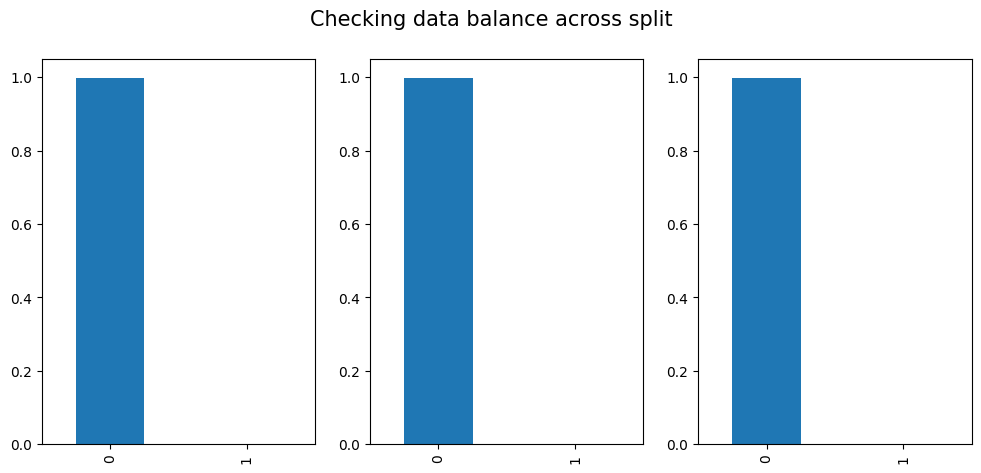

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

y_train.value_counts(normalize=True).plot(kind='bar', ax=ax1)
y_test.value_counts(normalize=True).plot(kind='bar', ax=ax2)
y_val.value_counts(normalize=True).plot(kind='bar', ax=ax3)

fig.suptitle("Checking data balance across split", fontsize=15)
plt.plot();

We've successfully splitted the dataset into 3 sets... a training set, test and validation set. Here's our reason for [cross-validation](https://www.geeksforgeeks.org/cross-validation-machine-learning/).

So far we have class balance across the splits. Now to apply the SMOTE [technique](Understanding%20the%20dataset.ipynb#Conclusion) on the train data.

In [10]:
over_sample = SMOTE()

X_train, y_train = over_sample.fit_resample(X_train, y_train)

X_train.shape, y_train.shape

((341178, 30), (341178,))

Training data now increased from 170884 to 341178, that's roughly twice the original data.

Let's preview the class balance this time.

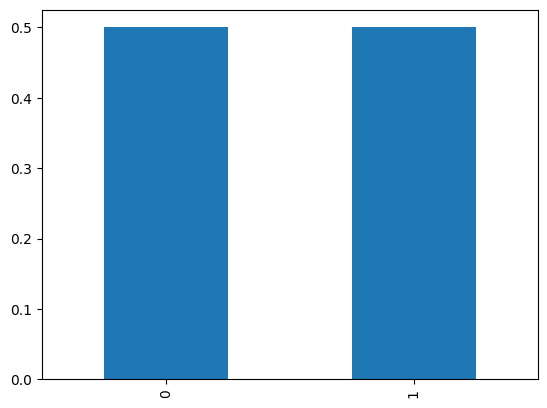

In [11]:
y_train.value_counts(normalize=True).plot(kind='bar');

There's now a much equal balance between both classes. [Explanation on the SMOTE sampling technique](https://imbalanced-learn.org/stable/over_sampling.html)

### Scaling the features

From our notebook 📓 on [understanding the dataset](Understanding%20the%20dataset.ipynb), we discovered the features `Amount` and `Time` are the major features to be scaled, the features `V1` to `V28` appears to have been properly scaled.

For this we'll apply the [Robust Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) for the features `Amount` and `Time`.

In [12]:
from sklearn.preprocessing import RobustScaler

In [13]:
rs = RobustScaler()

X_train['Amount'] = rs.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_train['Time'] = rs.fit_transform(X_train['Time'].values.reshape(-1,1))

X_train[['Amount', 'Time']].describe()

,Amount,Time
count,341178.000000,341178.000000
mean,0.756794,0.088252
std,2.374132,0.556151
min,-0.271445,-0.920975
25%,-0.231940,-0.384881
50%,0.000000,0.000000
75%,0.768060,0.615119
max,266.816194,1.067567


### Training the Model

We can now proceed to training and evaluating our model.

We'll start by applying a `cross_val_score` to see how our model performs on a 5-folds of [cross-validation](https://www.geeksforgeeks.org/cross-validation-machine-learning/) using the `RandomForestClassifier`.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [15]:
scores = cross_val_score(
    RandomForestClassifier(), X_train, y_train,
    cv=5, scoring='accuracy', n_jobs=-1
)
scores

array([0.99988276, 0.99988276, 0.99983879, 0.99989741, 0.99995603])

accuracy_score model without any form of fine-tuning has an accuracy of 99% across each fold, without fine-tuning.

Now for the moment of truth, let's train and see the result on the validation set.

Testing on the validation set implies testing on data the model has not seen before, same with the testing set.

In [16]:
test_model = RandomForestClassifier()

test_model.fit(X_train, y_train)
predictions = test_model.predict(X_val)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_val, predictions)

0.9994382153975796

We got an accuracy of roughly 99.94%! This is good!!! 😌 

It implies our model can properly distinguish between a fraudulent and non-fraudulent card transaction with an accuracy of 99.94%.

we can now create our final model, which would combine both the training and validation set to train a model that can adequately predict between fraudulent and non-fraudulent card transactions.

In [19]:
X_train = pd.concat((X_train, X_val))
y_train = pd.concat((y_train, y_val))

X_train.shape, y_train.shape

((383899, 30), (383899,))

In [20]:
final_model = RandomForestClassifier()

final_model.fit(X_train, y_train)
predictions = final_model.predict(X_test)

In [21]:
accuracy_score(y_test, predictions)

0.9993960843796522

Our final model has an accuracy of 99.94% on the test set and can now be serialized and used to generalize to new inputs.

In [22]:
import joblib

In [23]:
joblib.dump(final_model, open('creditcardmodel.z', 'wb'))

### Conclusion

Our model performed absolutely well, with the accuracy of 99.94% at the final model.

**Important Note 📝**: only the training set of the data had the SMOTE technique for over sampling applied to it... this goes to show that the validation and test set still had the ratio between the class 0 (for non-fradulent activities) and 1 (for fradulent activities) as 99.83% to 00.17% respectively.

This proves the model was able to properly spot the difference between non-fradulent and fradulent credit card transactions, irrespective of their imbalance.